## 查詢 Nvidia 驅動程式版本與 GPU 顯示卡資訊

In [ ]:
! nvidia-smi

Wed Jul 22 05:08:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 複製 Darknet

* git clone 下載遠端儲存庫至本地端
* cd 改變位置
* head 讀取所給予檔案的內容，並將其內容的最前面部份作標準輸出，預設為10行。
* sed -i 修改檔案
* make 執行

In [ ]:
! git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5910, done.
remote: Total 5910 (delta 0), reused 0 (delta 0), pack-reused 5910
Receiving objects: 100% (5910/5910), 6.33 MiB | 4.97 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.


In [ ]:
! cd darknet; head Makefile  

GPU=0
CUDNN=0
OPENCV=0
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]


## 修改 Makefile
- GPU=1
- CUDNN=1
- OPENCV=1

In [ ]:
! sed -i "s/GPU=0/GPU=1/g" /content/darknet/Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" /content/darknet/Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" /content/darknet/Makefile

In [ ]:
! head /content/darknet/Makefile  

GPU=1
CUDNN=1
OPENCV=1
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]


## 編譯 YOLO

In [ ]:
! cd darknet; make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN 

## 檢視訓練資料集
### Medical Masks Dataset
- https://www.kaggle.com/vtech6/medical-masks-dataset/data
* 此數據即包含帶著醫用口罩者的JPG影像極其詳細說明的XML文件。
* 有682張影像且超過3000張貸者口罩，以及大約700張戴錯誤或完全沒有配戴口罩。XML文件包含其位置並標記為good、none或bad。

---

* 使用drive.mount指令，透過輸入key方式與雲端硬碟連結。
* 使用cp指令複製檔案與目錄
* 使用unzip指令解壓zip檔案
* 使用cat指令，將檔案依照順序讀取並把內容送到標準輸出（螢幕）
* 使用PIL中的Image.open來開啟與呈現影像
* 使用rm指令刪除檔案與目錄。-rf則是強制刪除並不會跳出警告。
* 使用mkdir指令建立一個新的目錄

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#口罩資料
! cp "/content/drive/My Drive/aidataset/medical-masks-dataset.zip" /content/

In [ ]:
#解壓縮口罩資料
! unzip /content/medical-masks-dataset.zip > data_unzip.log

In [ ]:
#讀取口罩資料中一個xml檔案
! cat /content/labels/012106.jpg_1140x855.xml

<annotation>
	<folder>images</folder>
	<filename>012106.jpg_1140x855.jpg</filename>
	<path>P:\mask_mouth\images\012106.jpg_1140x855.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1140</width>
		<height>855</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>good</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>654</xmin>
			<ymin>275</ymin>
			<xmax>910</xmax>
			<ymax>517</ymax>
		</bndbox>
	</object>
</annotation>


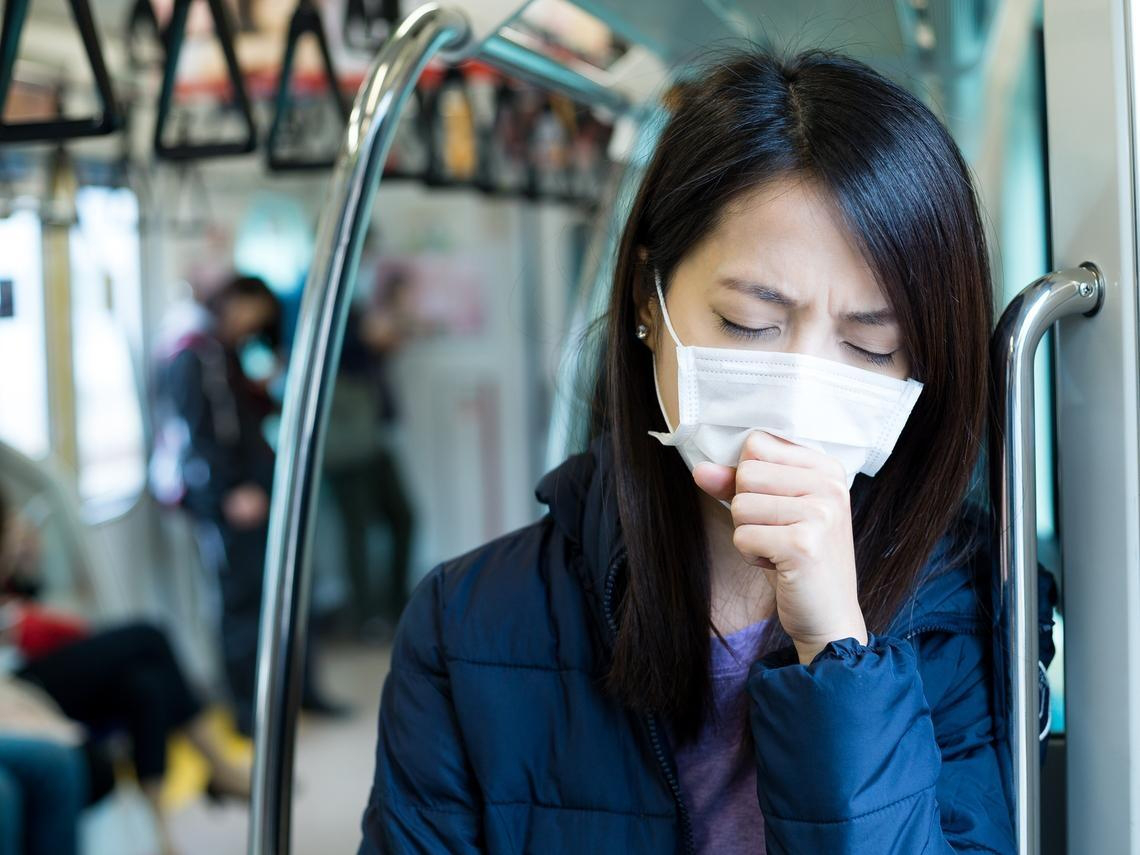

In [ ]:
from PIL import Image

#讀取與呈現口罩資料中一個影像檔案
img = Image.open('/content/images/012106.jpg_1140x855.jpg')

img

In [ ]:
#讀取口罩資料中另一個xml檔案
! cat /content/labels/000b7b75-1600.xml

<annotation>
	<folder>images</folder>
	<filename>000b7b75-1600.jpg</filename>
	<path>P:\mask_mouth\images\000b7b75-1600.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1600</width>
		<height>900</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>good</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>1</xmin>
			<ymin>263</ymin>
			<xmax>104</xmax>
			<ymax>373</ymax>
		</bndbox>
	</object>
	<object>
		<name>good</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>74</xmin>
			<ymin>183</ymin>
			<xmax>176</xmax>
			<ymax>291</ymax>
		</bndbox>
	</object>
	<object>
		<name>bad</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>301</xmin>
			<ymin>151</ymin>
			<xmax>416</xmax>
			<ymax>243</ymax>
		</bndbox>
	</object>
	<object>
		<name>good</name>
		<pose>U

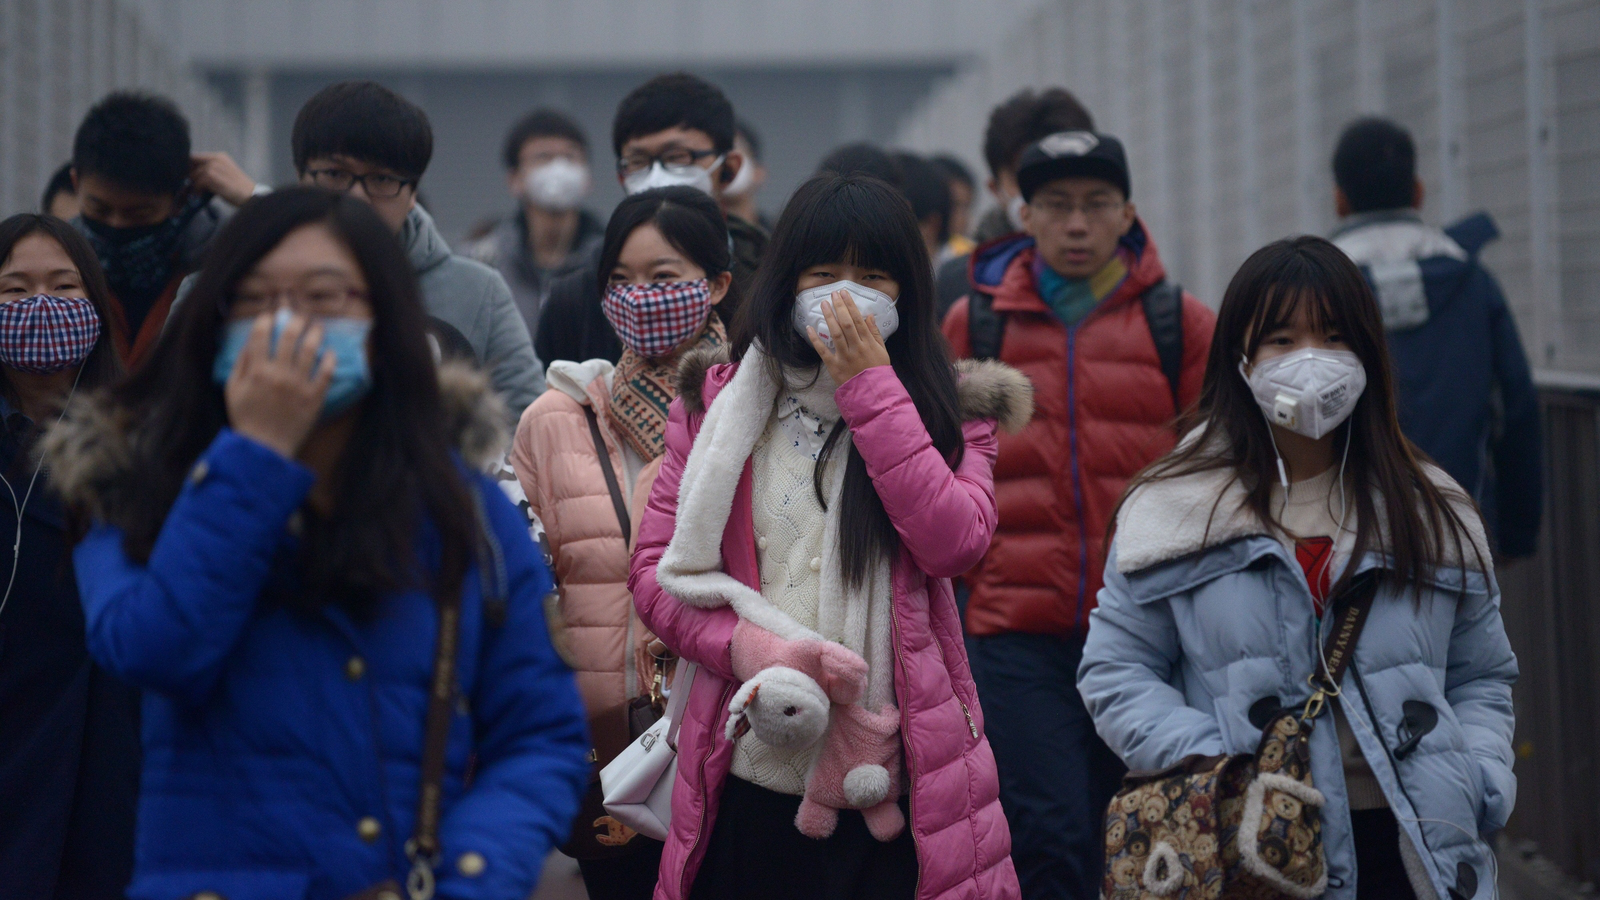

In [ ]:
from PIL import Image

#讀取與呈現口罩資料中另一個影像檔案
img = Image.open('/content/images/000b7b75-1600.jpg')

img

In [ ]:
! rm -rf /content/yolo
! mkdir /content/yolo

In [ ]:
from bs4 import BeautifulSoup
import os
import shutil

#口罩標籤
status_dic = {'good': 2, 'bad': 1, 'none': 0}

def getYoloFormat(filename,label_path, img_path, yolo_path, newname):
    with open(label_path+ filename, 'r') as f:
        soup = BeautifulSoup(f.read(), 'xml')
        imgname = soup.select_one('filename').text
        image_w = int(soup.select_one('width').text)
        image_h = int(soup.select_one('height').text)
        ary = []
        for obj in soup.select('object'):
            xmin = int(obj.select_one('xmin').text)
            xmax = int(obj.select_one('xmax').text)
            ymin = int(obj.select_one('ymin').text)
            ymax = int(obj.select_one('ymax').text)
            objclass = status_dic.get(obj.select_one('name').text)

            x = (xmin + (xmax-xmin)/2) * 1.0 / image_w
            y = (ymin + (ymax-ymin)/2) * 1.0 / image_h
            w = (xmax-xmin) * 1.0 / image_w
            h = (ymax-ymin) * 1.0 / image_h
            ary.append(' '.join([str(objclass), str(x),str(y),str(w),str(h)]))
        if os.path.exists(img_path + imgname):
            shutil.copyfile(img_path + imgname, yolo_path + newname + '.jpg')
            with open(yolo_path + newname + '.txt', 'w') as f:
                f.write('\n'.join(ary))

In [ ]:
import os

#口罩辨識位置
labelpath = '/content/labels/'
imgpath   = '/content/images/'
yolopath  = '/content/yolo/'


ary = []
for idx, f in enumerate(os.listdir(labelpath)):
    try:
        getYoloFormat(f, labelpath,imgpath, yolopath, str(idx))
    except Exception as e:
        print(e)

float division by zero


In [ ]:
! cat /content/yolo/2.txt

1 0.2851851851851852 0.26716917922948075 0.044444444444444446 0.06867671691792294
1 0.39444444444444443 0.1390284757118928 0.04567901234567901 0.07705192629815745
2 0.6444444444444445 0.18341708542713567 0.06419753086419754 0.09882747068676717

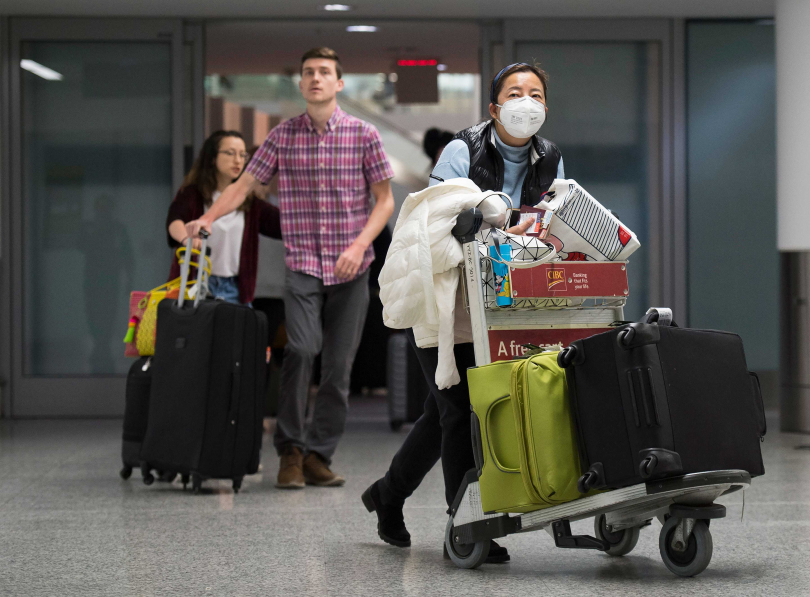

In [ ]:
from PIL import Image
Image.open('/content/yolo/2.jpg')

## 準備訓練與測試資料集

In [ ]:
! rm -rf /content/cfg_mask
! mkdir /content/cfg_mask

In [ ]:
import os
datasets = ['/content/yolo/'+ f for f in os.listdir('/content/yolo/') if not f.endswith('.txt')]
len(datasets) * 0.8

541.6

In [ ]:
with open('/content/cfg_mask/train.txt', 'w') as f:
    f.write('\n'.join(datasets[0:540]))

In [ ]:
with open('/content/cfg_mask/test.txt', 'w') as f:
    f.write('\n'.join(datasets[540:]))

## 複製參數檔案

In [ ]:
! cp "/content/drive/My Drive/aidataset/cfg_mask/obj.data" cfg_mask/
! cp "/content/drive/My Drive/aidataset/cfg_mask/obj.names" cfg_mask/

In [ ]:
! head /content/cfg_mask/obj.data

classes= 3
train  = /content/cfg_mask/train.txt
valid  = /content/cfg_mask/test.txt
names  = /content/cfg_mask/obj.names
backup = /content/cfg_mask/weights/

In [ ]:
! head /content/cfg_mask/obj.names

none
bad
good


## 建立權重資料夾

In [ ]:
! mkdir /content/cfg_mask/weights

## YOLO v3 架構

In [ ]:
%%html
<img src='https://miro.medium.com/max/2000/1*d4Eg17IVJ0L41e7CTWLLSg.png' width="800px" />

In [ ]:
%%html
<img src='https://miro.medium.com/max/1200/0*3A8U0Hm5IKmRa6hu.png' width="500px" />

## 修改 yolov3-tiny.cfg
- YOLOV3 偵測的濾鏡(filter) 大小為 (C+5)*B. 
    - B 是每個Feature Map 可以偵測的Bounding Box 數量
    - 5 是Bounding Box 的x,y,w,h 以及 Confidence
    - C 是類別數量
- filters=(classes + 5)*3 # 24
- classes=3

In [ ]:
! cp /content/darknet/cfg/yolov3-tiny.cfg /content/cfg_mask/  

In [ ]:
! sed -n -e 127p -e 135p -e 171p -e 177p /content/cfg_mask/yolov3-tiny.cfg

filters=255
classes=80
filters=255
classes=80


In [ ]:
! sed -i '127s/255/24/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '135s/80/3/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '171s/255/24/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '177s/80/3/' /content/cfg_mask/yolov3-tiny.cfg

In [ ]:
! sed -n -e 127p -e 135p -e 171p -e 177p /content/cfg_mask/yolov3-tiny.cfg

filters=24
classes=3
filters=24
classes=3


## 複製權重
- darknet53: 利用Imagenet 訓練出來的 53 層預訓練模型

In [ ]:
#!wget https://pjreddie.com/media/files/darknet53.conv.74
! cp "/content/drive/My Drive/aidataset/darknet53.conv.74" /content/

## 訓練模型

In [ ]:
! darknet/darknet detector train /content/cfg_mask/obj.data /content/cfg_mask/yolov3-tiny.cfg /content/darknet53.conv.74

yolov3-tiny
layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 5

## 辨識圖片中的人物是否有戴口罩

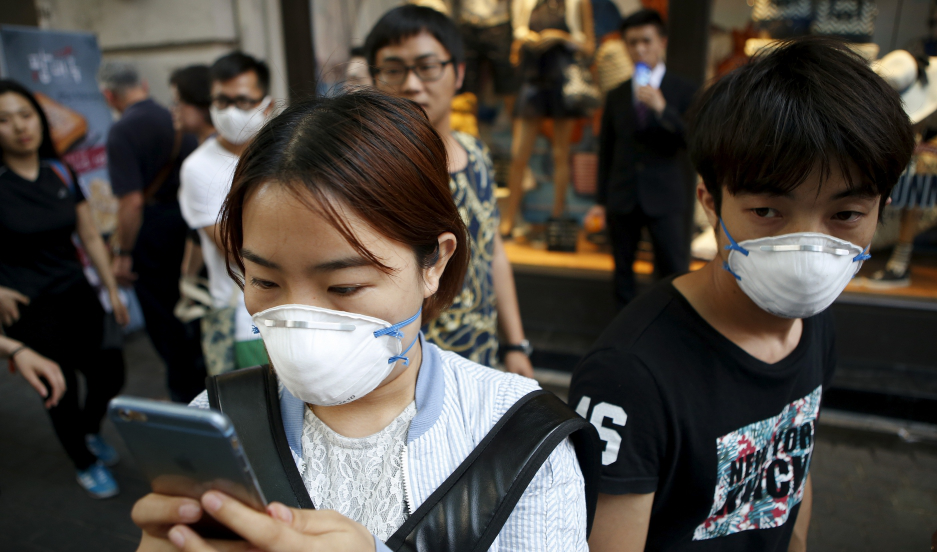

In [ ]:
from PIL import Image
Image.open('yolo/50.jpg')

In [ ]:
#口罩訓練好的權重檔
! cp "/content/drive/My Drive/aidataset/weights_mask/yolov3_1100.weights" /content/cfg_mask/
#口罩訓練好的設定檔
! cp "/content/drive/My Drive/aidataset/yolov3.cfg" /content/cfg_mask/

cp: cannot stat '/content/drive/My Drive/aidataset/yolov3.cfg': No such file or directory


In [ ]:
#影像代入模型中：需放入.data .cfg .weights .jpg 檔案
! cd darknet; ./darknet detector test /content/cfg_mask/obj.data  /content/cfg_mask/yolov3.cfg /content/cfg_mask/yolov3_1100.weights /content/yolo/50.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

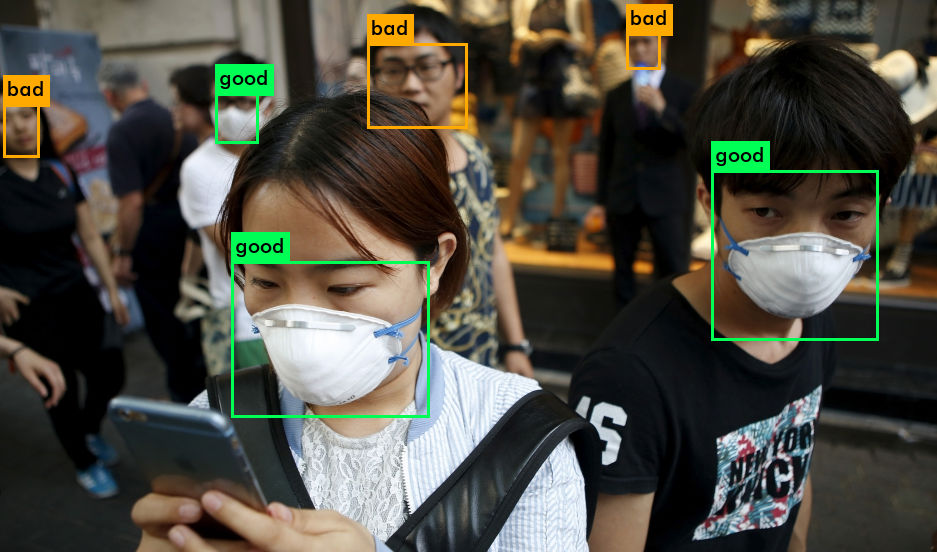

In [ ]:
from PIL import Image

Image.open('/content/darknet/predictions.jpg')

In [ ]:
! cp "/content/drive/My Drive/aidataset/test.jpg" /content/

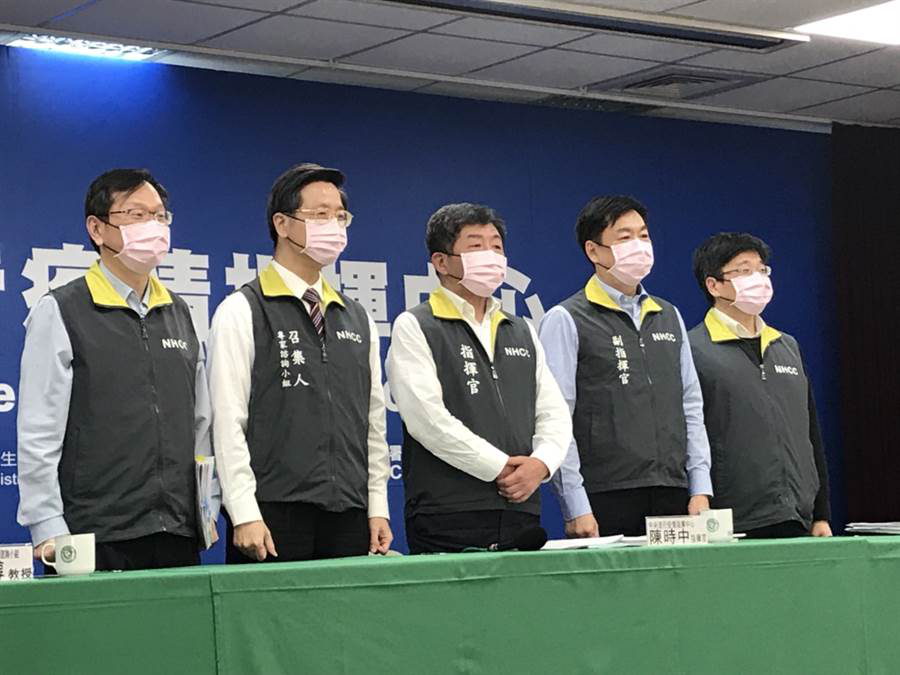

In [ ]:
from PIL import Image

Image.open('/content/test.jpg')

In [ ]:
! cd darknet; ./darknet detector test /content/cfg_mask/obj.data  /content/cfg_mask/yolov3.cfg /content/cfg_mask/yolov3_mask.weights /content/test.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

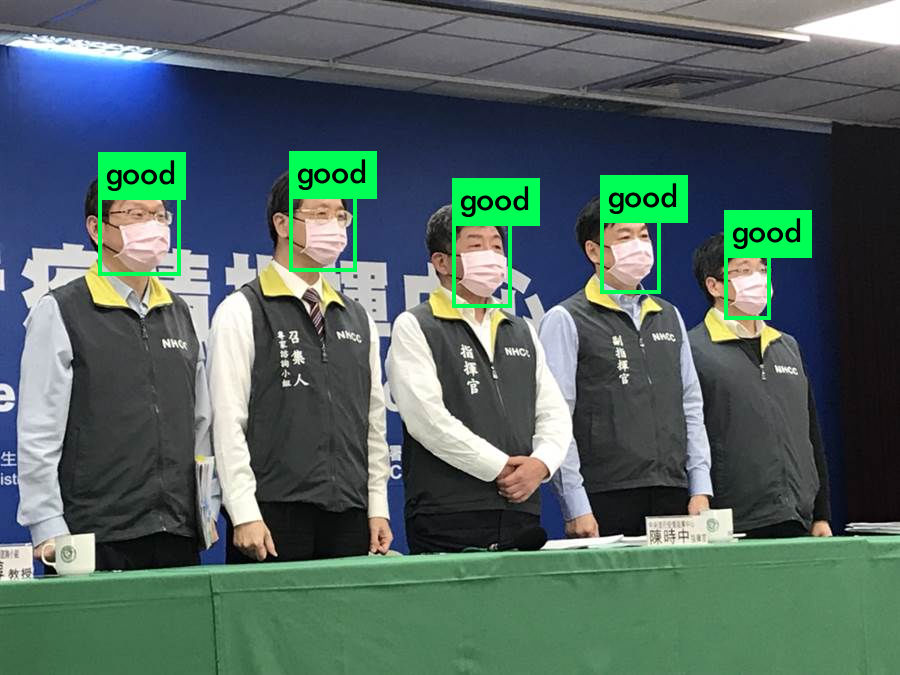

In [ ]:
from PIL import Image
Image.open('/content/darknet/predictions.jpg')